# An In-Depth Analysis of Gun Violence in America

### Will M, Ethan B, Zichao L

# Part 1: Introduction

Gun violence has become a significant problem in America today. We are constantly reminded by news reports and social media that gun violence is a part of our lives - as a result, our lives are being disrupted by this threat. Schools are enforcing shooting drills, products like bulletproof vests are becoming ever more common, and our politics are being divided over what the right thing to do is.

In 2020, gun violence was the most common cause of death among people younger than 19. Between 1968 and 2011, an estimated 1.4 million Americans died from gun violence. The gun-related homicide rate in the United States is 25 times higher than in other developed countries. Because of these statistics, it makes sense that the general public be informed about this issue.

In this tutorial, we will do an in-depth analysis of the history, causes and effects of gun violence. The data we will be using can be found <a id = "https://github.com/jamesqo/gun-violence-data"here></a>. The ultimate goal is to understand the factors that contribute the most to gun violence. 

# Part 2: Data

We will start by importing the necesary packages.

In [1]:
import pandas as pd
import numpy as np

The first thing we need to do is to read in our data. This can be done with pandas, and here is the result:

In [2]:
data = pd.read_csv("stage3.csv")
data.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

This table is rather big, so we will need to do some cleaning and tidying before we can start our analysis. 

Firstly, we won't need all the data in this table. According to the dataset, some of the columns are not required - and thus, may contain NaN values. We don't want this as it will make our analysis more difficult than it needs to be. Out of the 29 columns, only 9 are required. That being said, we don't want to remove all of these unreqired columns, as some also contain value information we will need. The columns we will be removing are those that are not required and necesary for this analysis.

The following columns will be removed:
- source_url
- congressional_district
- location_description
- notes
- participant_name
- sources
- state_house_district
- state_senate_district

Here is the result:

In [3]:
columns_to_remove = [
    "source_url",
    "congressional_district",
    "location_description",
    "notes",
    "participant_name",
    "sources",
    "state_house_district",
    "state_senate_district",
]
data = data.drop(columns=columns_to_remove)
data.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

   incident_url_fields_missing              gun_stolen  ...  \
0                        False                     NaN  ...   
1                        False                     NaN  ...   
2                        False  0::Unknown||1::Unknown  ...   
3                        False                     NaN  ...   
4                        False  0::Unknown||1::Unknown  ...   

                            incident_characteristics latitude  longitude  \
0  Shot - Wounded/Injured||Mass Shooting (4+ vict...  40.3467   -79.8559   
1  Shot - Wounded/Injured||Shot - Dead (murder, a...  33.9090  -118.3330   
2  Shot - Wounded/Injured||Shot - Dead (murder, a...  41.4455   -82.1377   
3  Shot - Dead (murder, accidental, suicide)||Off...  39.6518  -104.8020   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...  36.1140   -79.9569   

   n_guns_involved                    participant_age  \
0              NaN                              0::20   
1              NaN                              0::20   
2              2.0  0::25||1::31||2::33||3::34||4::33   
3              NaN         0::29||1::33||2::56||3::33   
4              2.0         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender participant_relationship  \
0         0::Male||1::Male||3::Male||4::Female                      NaN   
1                                      0::Male                      NaN   
2  0::Male||1::Male||2::Male||3::Male||4::Male                      NaN   
3         0::Female||1::Male||2::Male||3::Male                      NaN   
4       0::Female||1::Male||2::Male||3::Female                3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...  
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...  

[5 rows x 21 columns]

Secondly, we need to remove columns that were well-formed but are either unncecsary or contain sensitive information, like an address. We want this analysis to remain as anonymous as possible, and we want to respect those who were affected by these incidents.

We will handle NaN values on a per-situation basis. Pandas allows us to deal with these situations by offering functions like `isnull()` which checks if a row of data contains any NaNs. With this, we can continue our analysis without much trouble.

In [4]:
labels = ["address", "incident_url", "incident_url_fields_missing"]
data = data.drop(columns=labels)
data.head()

incident_id        date           state city_or_county  n_killed  \
0       461105  2013-01-01    Pennsylvania     Mckeesport         0   
1       460726  2013-01-01      California      Hawthorne         1   
2       478855  2013-01-01            Ohio         Lorain         1   
3       478925  2013-01-05        Colorado         Aurora         4   
4       478959  2013-01-07  North Carolina     Greensboro         2   

   n_injured              gun_stolen                gun_type  \
0          4                     NaN                     NaN   
1          3                     NaN                     NaN   
2          3  0::Unknown||1::Unknown  0::Unknown||1::Unknown   
3          0                     NaN                     NaN   
4          2  0::Unknown||1::Unknown  0::Handgun||1::Handgun   

                            incident_characteristics  latitude  longitude  \
0  Shot - Wounded/Injured||Mass Shooting (4+ vict...   40.3467   -79.8559   
1  Shot - Wounded/Injured||Shot - Dead (murder, a...   33.9090  -118.3330   
2  Shot - Wounded/Injured||Shot - Dead (murder, a...   41.4455   -82.1377   
3  Shot - Dead (murder, accidental, suicide)||Off...   39.6518  -104.8020   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...   36.1140   -79.9569   

   n_guns_involved                    participant_age  \
0              NaN                              0::20   
1              NaN                              0::20   
2              2.0  0::25||1::31||2::33||3::34||4::33   
3              NaN         0::29||1::33||2::56||3::33   
4              2.0         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender participant_relationship  \
0         0::Male||1::Male||3::Male||4::Female                      NaN   
1                                      0::Male                      NaN   
2  0::Male||1::Male||2::Male||3::Male||4::Male                      NaN   
3         0::Female||1::Male||2::Male||3::Male                      NaN   
4       0::Female||1::Male||2::Male||3::Female                3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...  
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...  
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...

Since 2013 was when data collection it is not exhaustive (as stated in the dataset) so it doesn't give an accurate representation on the year. We decided to remove it due to this.

In [5]:
data = data[data["date"].str.contains("2013") == False]
data.head()

incident_id        date       state city_or_county  n_killed  n_injured  \
278        95289  2014-01-01    Michigan       Muskegon         0          0   
279        92401  2014-01-01  New Jersey         Newark         0          0   
280        92383  2014-01-01    New York         Queens         1          0   
281        92142  2014-01-01    New York       Brooklyn         0          1   
282        95261  2014-01-01    Missouri    Springfield         0          1   

    gun_stolen gun_type                   incident_characteristics  latitude  \
278        NaN      NaN                  Shots Fired - No Injuries   43.2301   
279        NaN      NaN                  Officer Involved Incident   40.7417   
280        NaN      NaN  Shot - Dead (murder, accidental, suicide)   40.7034   
281        NaN      NaN                     Shot - Wounded/Injured   40.6715   
282        NaN      NaN                     Shot - Wounded/Injured   37.2646   

     longitude  n_guns_involved participant_age         participant_age_group  \
278   -86.2514              NaN             NaN                  0::Adult 18+   
279   -74.1695              NaN             NaN                           NaN   
280   -73.7474              NaN    0::22||1::26    0::Adult 18+||1::Adult 18+   
281   -73.9476              NaN           0::34    0::Adult 18+||1::Adult 18+   
282   -93.3007              NaN     0::6||1::12  0::Child 0-11||1::Teen 12-17   

    participant_gender participant_relationship       participant_status  \
278          0::Female                      NaN              0::Unharmed   
279                NaN                      NaN                      NaN   
280   0::Male||1::Male                      NaN   0::Killed||1::Unharmed   
281   0::Male||1::Male                      NaN               0::Injured   
282          0::Female                      NaN  0::Injured||1::Unharmed   

                  participant_type  
278                      0::Victim  
279                            NaN  
280  0::Victim||1::Subject-Suspect  
281  0::Victim||1::Subject-Suspect  
282  0::Victim||1::Subject-Suspect

Now we will convert date to datetime so we can use it later.

In [6]:
data["date"] = pd.to_datetime(data["date"])
data.head()

incident_id       date       state city_or_county  n_killed  n_injured  \
278        95289 2014-01-01    Michigan       Muskegon         0          0   
279        92401 2014-01-01  New Jersey         Newark         0          0   
280        92383 2014-01-01    New York         Queens         1          0   
281        92142 2014-01-01    New York       Brooklyn         0          1   
282        95261 2014-01-01    Missouri    Springfield         0          1   

    gun_stolen gun_type                   incident_characteristics  latitude  \
278        NaN      NaN                  Shots Fired - No Injuries   43.2301   
279        NaN      NaN                  Officer Involved Incident   40.7417   
280        NaN      NaN  Shot - Dead (murder, accidental, suicide)   40.7034   
281        NaN      NaN                     Shot - Wounded/Injured   40.6715   
282        NaN      NaN                     Shot - Wounded/Injured   37.2646   

     longitude  n_guns_involved participant_age         participant_age_group  \
278   -86.2514              NaN             NaN                  0::Adult 18+   
279   -74.1695              NaN             NaN                           NaN   
280   -73.7474              NaN    0::22||1::26    0::Adult 18+||1::Adult 18+   
281   -73.9476              NaN           0::34    0::Adult 18+||1::Adult 18+   
282   -93.3007              NaN     0::6||1::12  0::Child 0-11||1::Teen 12-17   

    participant_gender participant_relationship       participant_status  \
278          0::Female                      NaN              0::Unharmed   
279                NaN                      NaN                      NaN   
280   0::Male||1::Male                      NaN   0::Killed||1::Unharmed   
281   0::Male||1::Male                      NaN               0::Injured   
282          0::Female                      NaN  0::Injured||1::Unharmed   

                  participant_type  
278                      0::Victim  
279                            NaN  
280  0::Victim||1::Subject-Suspect  
281  0::Victim||1::Subject-Suspect  
282  0::Victim||1::Subject-Suspect

Now we will create columns for each part of the date.  
Here is the final result, and the data we will be using in the rest of the analysis:

In [7]:
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
data["month_year"] = data["date"].dt.to_period("M")
data.head()

incident_id       date       state city_or_county  n_killed  n_injured  \
278        95289 2014-01-01    Michigan       Muskegon         0          0   
279        92401 2014-01-01  New Jersey         Newark         0          0   
280        92383 2014-01-01    New York         Queens         1          0   
281        92142 2014-01-01    New York       Brooklyn         0          1   
282        95261 2014-01-01    Missouri    Springfield         0          1   

    gun_stolen gun_type                   incident_characteristics  latitude  \
278        NaN      NaN                  Shots Fired - No Injuries   43.2301   
279        NaN      NaN                  Officer Involved Incident   40.7417   
280        NaN      NaN  Shot - Dead (murder, accidental, suicide)   40.7034   
281        NaN      NaN                     Shot - Wounded/Injured   40.6715   
282        NaN      NaN                     Shot - Wounded/Injured   37.2646   

     ...  participant_age         participant_age_group participant_gender  \
278  ...              NaN                  0::Adult 18+          0::Female   
279  ...              NaN                           NaN                NaN   
280  ...     0::22||1::26    0::Adult 18+||1::Adult 18+   0::Male||1::Male   
281  ...            0::34    0::Adult 18+||1::Adult 18+   0::Male||1::Male   
282  ...      0::6||1::12  0::Child 0-11||1::Teen 12-17          0::Female   

    participant_relationship       participant_status  \
278                      NaN              0::Unharmed   
279                      NaN                      NaN   
280                      NaN   0::Killed||1::Unharmed   
281                      NaN               0::Injured   
282                      NaN  0::Injured||1::Unharmed   

                  participant_type  year month  day  month_year  
278                      0::Victim  2014     1    1     2014-01  
279                            NaN  2014     1    1     2014-01  
280  0::Victim||1::Subject-Suspect  2014     1    1     2014-01  
281  0::Victim||1::Subject-Suspect  2014     1    1     2014-01  
282  0::Victim||1::Subject-Suspect  2014     1    1     2014-01  

[5 rows x 22 columns]

Now that our data has been cleaned up, it's time to explain what we are looking at. This dataset tracked every since recorded incident of gun violence between early 2013 and early 2018 in the United States. It contains all the critical information we need to understand each incident that occured, such as where and when it happened, who was involved, and what the outcome was. Below is a summary of each column and what it tells us about the incident.

- date: when the incident occured
- state: what state the incident occured in
- city_or_county: what city or county the incident occured in
- n_killed: how many people were killed in the incident
- n_injured: how many people were injured in the incident
- gun_stolen: whether or not the gun/guns used were stolen
- gun_type: what type of gun/guns were used
- incident_characteristics: specific details about the incident
- latitude: geographic latitude of the incident
- longitude: geographic longitude of the incident
- n_guns_involved: how many guns involved in the incident
- participant_age: a breakdown of each participant's age
- participant_age_group: a breakdown of each participant's age group
- participant_gender: a breakdown of each participant's gender
- participant_relationship: a breakdown of each participant's relationship to other participants
- participant_status: a breakdown of the outcome of each participant
- participant_type: a breakdown of each participant's role in the incident  
- The extra date columns are just to make later analysis easier.

# Part 3 - Analysis

## Graphs

To begin our analysis, we want to get a good understanding of the data.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Fatalities in Mass Shootings

In [9]:
frequencies = {}
for _, row in data.iterrows():
    if row["n_killed"] not in frequencies:
        frequencies[row["n_killed"]] = 1
    else:
        frequencies[row["n_killed"]] += 1
for i in range(4):
    frequencies.pop(i, None)

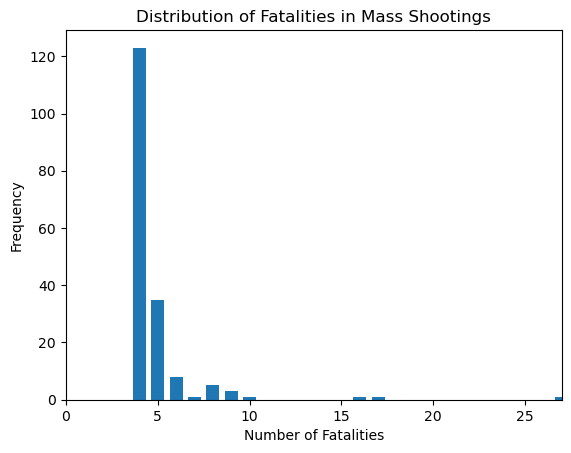

In [10]:
plt.bar(frequencies.keys(), frequencies.values(), width=0.7)
plt.xlim([0, 27])
plt.xlabel("Number of Fatalities")
plt.ylabel("Frequency")
plt.title("Distribution of Fatalities in Mass Shootings")
plt.show()

Another interesting visual would be a distribution of the number of fatalities. To do this we simply graph their value count but normalize the data to get precent values.

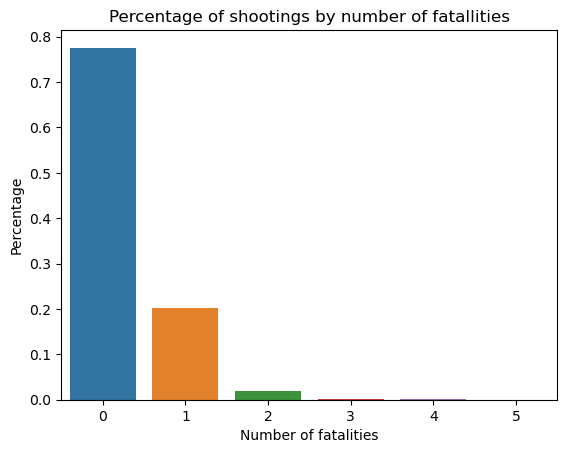

In [11]:
# Plotting normalized value counts of fatalities
k_freq = data["n_killed"].value_counts(normalize=True).iloc[0:6]
sns.barplot(x=k_freq.index, y=k_freq.values)
plt.xlabel("Number of fatalities")
plt.ylabel("Percentage")
plt.title("Percentage of shootings by number of fatallities")
plt.show()

As clearly seen the majority of gun violence has no fatalities. Only around 23% of incidents had one or more victims killed. 

### Frequency of Different Gun Types Used in Shootings

In [12]:
gun_types = {"Handgun": 0, "Rifle": 0, "Shotgun": 0}
gun_type_df = data.dropna(subset=["gun_type"])
for _, row in gun_type_df.iterrows():
    gun_types["Handgun"] += row["gun_type"].count("Handgun")
    gun_types["Rifle"] += row["gun_type"].count("Rifle")
    gun_types["Shotgun"] += row["gun_type"].count("Shotgun")

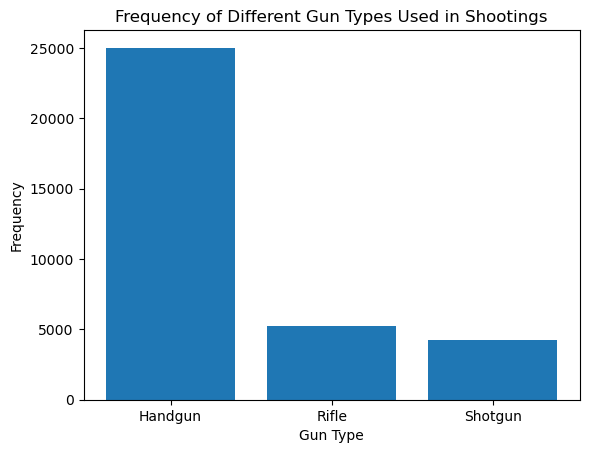

In [13]:
plt.bar(gun_types.keys(), gun_types.values())
plt.xlabel("Gun Type")
plt.ylabel("Frequency")
plt.title("Frequency of Different Gun Types Used in Shootings")
plt.show()

### Male Verses Deaths Involvement in Gun Violence

In [14]:
male_vs_female = {"Child 0-11": [0, 0], "Teen 12-17": [0, 0], "Adult 18+": [0, 0]}

gender_age_df = data.dropna(subset=["participant_gender", "participant_age_group"])

for _, row in gender_age_df.iterrows():
    tokens_gender = row["participant_gender"].split("||")
    tokens_gender = [e[3:] for e in tokens_gender]
    tokens_age_grp = row["participant_age_group"].split("||")
    tokens_age_grp = [e[3:] for e in tokens_age_grp]
    result = list(zip(tokens_gender, tokens_age_grp))
    for pair in result:
        if pair[0] == "Male":
            if pair[1] == "Child 0-11":
                male_vs_female["Child 0-11"][0] += 1
            elif pair[1] == "Teen 12-17":
                male_vs_female["Teen 12-17"][0] += 1
            elif pair[1] == "Adult 18+":
                male_vs_female["Adult 18+"][0] += 1
        elif pair[0] == "Female":
            if pair[1] == "Child 0-11":
                male_vs_female["Child 0-11"][1] += 1
            elif pair[1] == "Teen 12-17":
                male_vs_female["Teen 12-17"][1] += 1
            elif pair[1] == "Adult 18+":
                male_vs_female["Adult 18+"][1] += 1

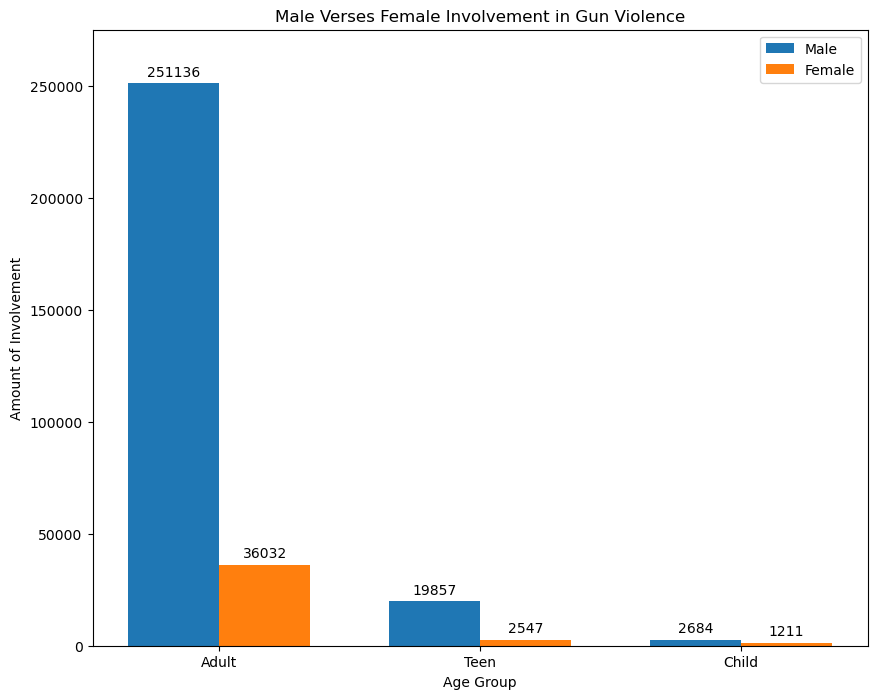

In [15]:
labels = ["Adult", "Teen", "Child"]
male_data = [
    male_vs_female["Adult 18+"][0],
    male_vs_female["Teen 12-17"][0],
    male_vs_female["Child 0-11"][0],
]
female_data = [
    male_vs_female["Adult 18+"][1],
    male_vs_female["Teen 12-17"][1],
    male_vs_female["Child 0-11"][1],
]

x_axis = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
rects1 = ax.bar(x_axis - width / 2, male_data, width, label="Male")
rects2 = ax.bar(x_axis + width / 2, female_data, width, label="Female")

ax.set_xlabel("Age Group")
ax.set_ylabel("Amount of Involvement")
ax.set_ylim([0, 275000])
ax.set_title("Male Verses Female Involvement in Gun Violence")
ax.set_xticks(x_axis, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.show()

### Mean Age of Participants Between 15 and 75 Verses Lethality

Lethality is calculated using the following formula: <br>

$ 2* Participants\ Killed + 1.5 * Participants\ Injured $

In [16]:
def mean_age_of_participants(row):
    ages = {k: 0 for k in range(15, 75)}
    for age in ages.keys():
        count = row.count(str(age))
        ages[age] += count
    lst = []
    for key, value in ages.items():
        if key * value != 0:
            lst.append(key * value)
    sum_of_ages, num_of_ages = float(sum(lst)), float(len(lst))
    if sum_of_ages == 0:
        return "Invalid"
    else:
        return sum_of_ages / num_of_ages


age_df = data.dropna(subset=["participant_age"])
raw, filtered = [], []
for _, row in age_df.iterrows():
    [mean_age, lethality] = mean_age_of_participants(row["participant_age"]), float(
        ((2 * row["n_killed"]) + (1.5 * row["n_injured"]))
    )
    raw.append([mean_age, lethality])
for entry in raw:
    if entry[0] != "Invalid":
        filtered.append(entry)

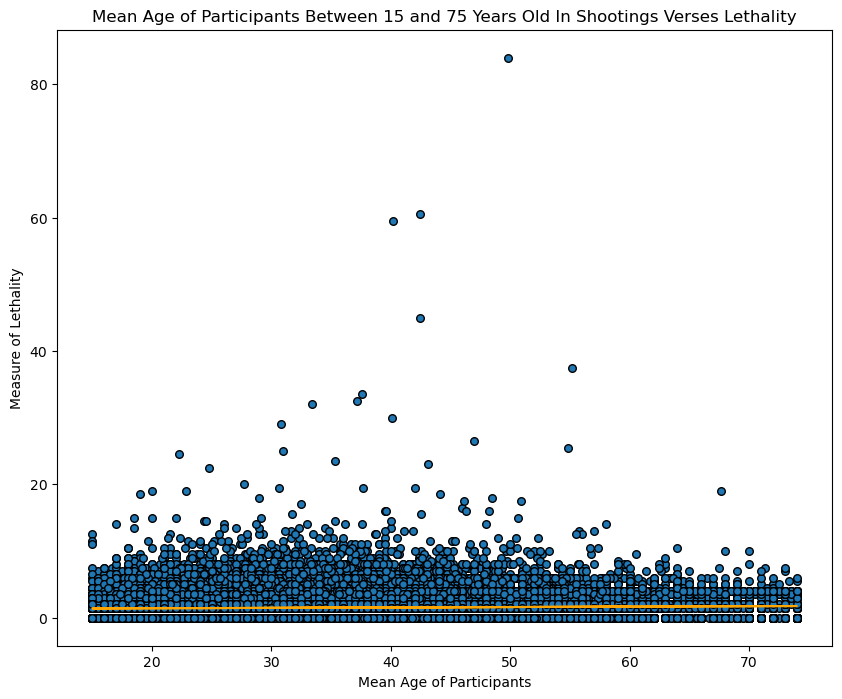

In [17]:
x_data, y_data = [], []
for entry in filtered:
    if entry[0] < 75 and entry[1] < 100:
        x_data.append(entry[0])
        y_data.append(entry[1])
[slope, intercept] = np.polyfit(x_data, y_data, 1)
plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, s=30, edgecolor="black")
plt.xlabel("Mean Age of Participants")
plt.ylabel("Measure of Lethality")
plt.title(
    "Mean Age of Participants Between 15 and 75 Years Old In Shootings Verses Lethality"
)
plt.plot(np.asarray(x_data), slope * np.asarray(x_data) + intercept, color="orange")
plt.show()

## Maps
One good way to visualize this data set is by generating maps. To do this first we get a geojson file containing the relevant infomation for each state. Then we count all entries by state and add it. This way we can graph both together.

In [18]:
# Getting GeoJson of US states from the folium and saving as geopandas(so we can add GeoJson tooltips)
# Source: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
import geopandas as gpd

state_geo = gpd.read_file("data/us-states.json")

In [19]:
# Summing up incidents per state
incident_count = data["state"].value_counts().reset_index()
incident_count.columns = ["name", "count"]
# Then merging since folium only does one data source for GeoJson
state_geo_count = state_geo.merge(incident_count, on="name")

Now that we have a valid dataframe we need to create our maps. To do this we will make a choropleth object, which will allow us to highlight each state based on gun violence volume. It uses our geojson to define state borders and the counts for their color.

In [20]:
from folium import Map, Choropleth
from folium.features import GeoJson, GeoJsonTooltip

# Creating map and choropleth
total_shootings_by_state_map = Map(location=[43, -102], zoom_start=4)

Choropleth(
    geo_data=state_geo,
    data=incident_count,
    bins=9,
    columns=["name", "count"],
    key_on="feature.properties.name",
    legend_name="Total shootings in state from 2014-2018",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.5,
    reset=True,
).add_to(total_shootings_by_state_map)

So now we have a map object and a choropleth object. To make the map more interactive we can add tool tips. This will essentially allow viewers to hover over states and view whatever we set. So we set some functions to control the colors of highlighting, then we specify what information will be showed. Then we add it to the map object.

In [21]:
# Styling functions and gjson tooltips
style = lambda x: {
    "fillColor": "#ffffff",
    "color": "#000000",
    "fillOpacity": 0.1,
    "weight": 0.1,
}

highlight = lambda x: {
    "fillColor": "#000000",
    "color": "#000000",
    "fillOpacity": 0.30,
    "weight": 0.1,
}

gjson = GeoJson(
    data=state_geo_count,
    style_function=style,
    highlight_function=highlight,
    control=False,
    tooltip=GeoJsonTooltip(
        fields=["name", "count"],
        aliases=["State", "Shootings"],
    ),
)
total_shootings_by_state_map.add_child(gjson)
total_shootings_by_state_map.keep_in_front(gjson)

Finally we display the map. This creates an js element storing all the relevant info.

In [22]:
# Showing the map
total_shootings_by_state_map

Next we will make a time based heatmap.  
First we must group all latitude/logitude pairs that occured within each month and make the time index.  
This approach is complicated but faster than doing it by for loop for some reason.

In [23]:
# Making heatmap dataframe and parsing it to fit constraints
heatmap_df = data.dropna(subset=["month_year", "latitude", "longitude"])
heat_data = (
    heatmap_df[["month_year", "latitude", "longitude"]]
    .groupby("month_year")
    .apply(lambda row: [list(tup) for tup in zip(row["latitude"], row["longitude"])])
    .tolist()
)

In [24]:
# Getting list of all time values sorted
time_index = list(heatmap_df["month_year"].astype("str").sort_values().unique())

Now we must make our actual map. We specify all the parameters we generated. Then we set a bunch of play back options.

In [25]:
from folium.plugins import HeatMapWithTime

# Making a heatmap object and inputting data
heatmap = Map(location=[43, -102], zoom_start=4)

HeatMapWithTime(
    heat_data,
    index=time_index,
    radius=10,
    auto_play=False,
    speed_step=1,
    min_speed=1,
).add_to(heatmap)

## MAP:  
(Zoom in to see specific areas)

In [26]:
heatmap

Another interesting question is how did the 2016 presidential election effect gun violence?  

First let's sum up every month in the dataset. To do this we use the value counts function then reorder it to a dataframe with relevant info, including date objects.

In [27]:
# Getting total count of incidents for every month
cpm = data["month_year"].value_counts().sort_index().to_frame()
cpm.columns = ["count"]
cpm["year"] = cpm.index.year
cpm["month"] = cpm.index.month
# months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cpm.head()

count  year  month
2014-01   4395  2014      1
2014-02   3045  2014      2
2014-03   3669  2014      3
2014-04   3891  2014      4
2014-05   4320  2014      5

Then we can select 2015-2017 using the pandas query function and visualize it to see how the election impacted gun violence.  
This gives us the following:

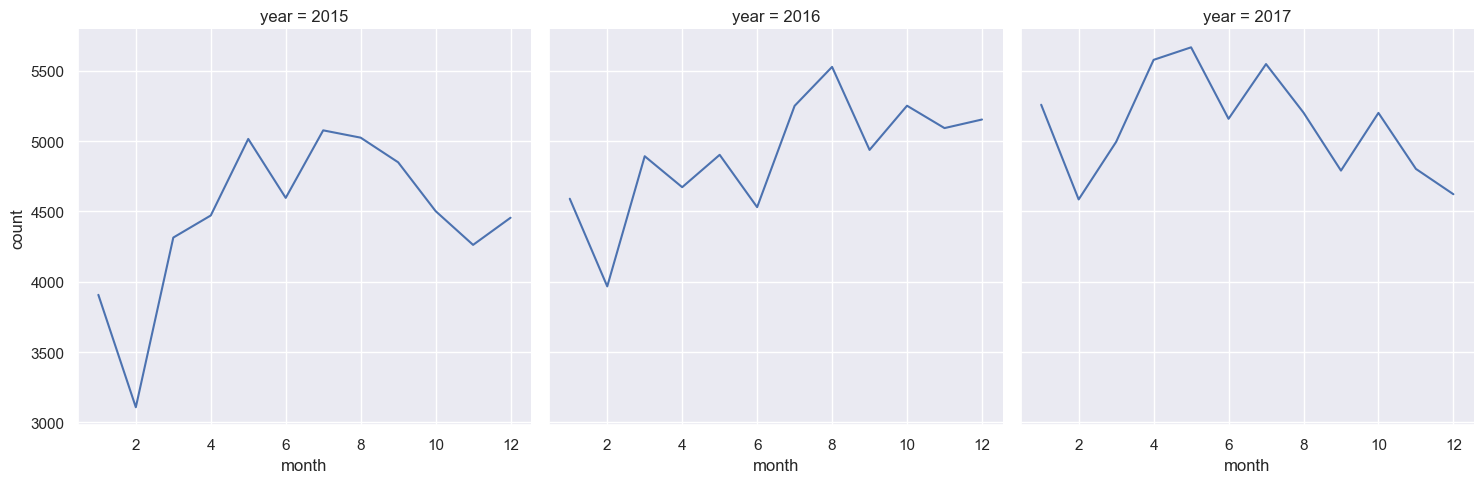

In [28]:
sns.set_theme()
election_df = cpm.query("year >= 2015 and year <= 2017")
sns.relplot(election_df, x="month", y="count", col="year", kind="line")

We can view this overlayed as well. Using seaborns hue parameter we can display multiple lines on the same graph like so.
### Overlayed:

[Text(0.5, 1.0, 'Total shootings per month over 2015-2017')]

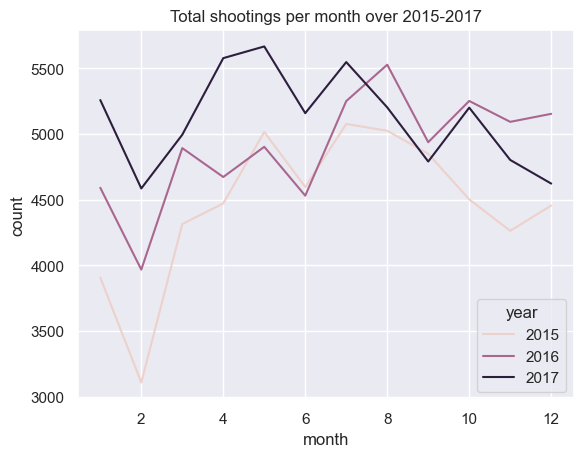

In [29]:
sns.lineplot(election_df, x="month", y="count", hue="year").set(
    title="Total shootings per month over 2015-2017"
)

So it does appear gun violence spiked starting around November 2016. However in the overlay we see that there is a spike around that time every year. Total gun violence seems to be increasing. To confirm this we could plot all available years using the same hue paramter:

[Text(0.5, 1.0, 'Total gun violence per month over 2014-2018')]

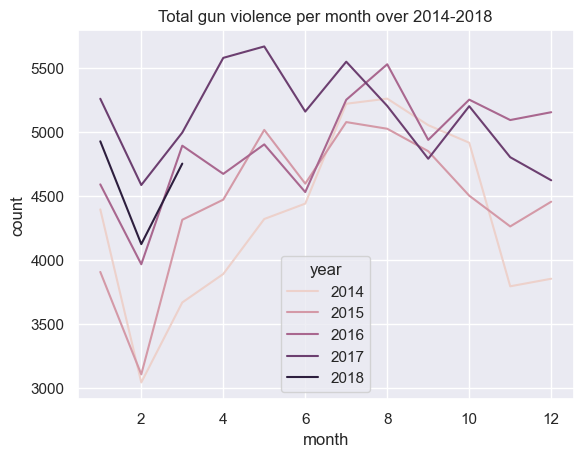

In [30]:
sns.lineplot(cpm, x="month", y="count", hue="year").set(
    title="Total gun violence per month over 2014-2018"
)

We could also average the months over the recorded years. To do this we group by month then take the mean of their counts. After we get the following:

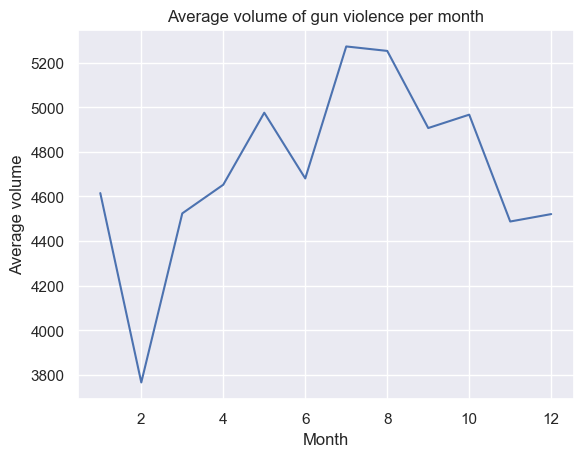

In [31]:
# Getting average incidents per month
mc = cpm.groupby("month")["count"].mean()
sns.lineplot(x=mc.index, y=mc.values)
plt.xlabel("Month")
plt.ylabel("Average volume")
plt.title("Average volume of gun violence per month")
plt.show()

They clearly all follow the same trends. The only difference it appears is each year the volume of gun violence increased. To confirm we could sum up the whole year and check. So using the same groupby technique:

In [32]:
yc = cpm.groupby("year")["count"].sum()
yc

year
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: count, dtype: int64

As we can see 2018 only had a few months of recorded data in the set, so we should probably remove it when comparing years:

In [33]:
yc = yc.drop(index=yc.index[-1])
yc

year
2014    51854
2015    53579
2016    58763
2017    61401
Name: count, dtype: int64

Then we can plot the counts as a barplot to give a good idea the trend.

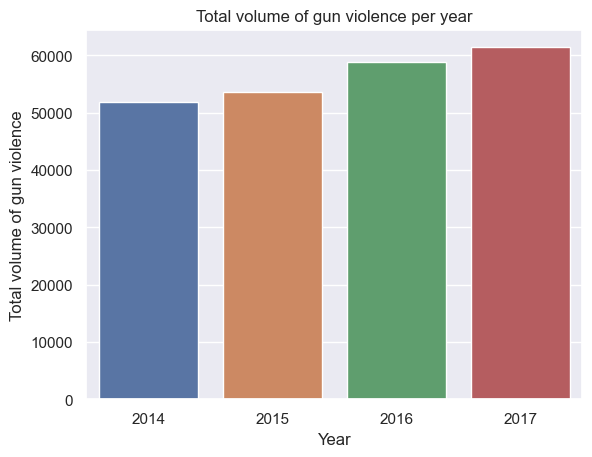

In [34]:
sns.barplot(x=yc.index, y=yc.values)
plt.xlabel("Year")
plt.ylabel("Total volume of gun violence")
plt.title("Total volume of gun violence per year")
plt.show()

So overall gun violence has been increasing each year.

## Part 4: Analysis, Hypothesis Testing, and ML

Can we predict the amount of gun violence events based on their date?  
We will try to use two types of regression and see.  
First we need to get the total count for every day. We use value counts the transform the result into a dataframe.

In [35]:
cpd = data["date"].value_counts().sort_index().to_frame().copy()
cpd.index = pd.to_datetime(cpd.index)

cpd.columns = ["count"]
cpd["year"] = cpd.index.year
cpd["month"] = cpd.index.month
cpd["day"] = cpd.index.day
cpd.head()

count  year  month  day
2014-01-01    216  2014      1    1
2014-01-02    119  2014      1    2
2014-01-03    124  2014      1    3
2014-01-04    140  2014      1    4
2014-01-05    130  2014      1    5

First we will try linear regression. We are going to try and predict gun violence in 2018, and use the rest of the dates to train. So we get all the years before 2018 using the query. Then we format them into input and output data sklearn will accept. Finally we add the predictions to the dataframe and drop irrelevant columns so we can easily graph it.

In [36]:
# Fit training data with linear regression
from sklearn.linear_model import LinearRegression

train_df = cpd.query("year < 2018").copy()

X_train = train_df.iloc[:, 1:4].values
y_train = train_df.iloc[:, 0].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)

train_df["pred"] = train_df.apply(
    lambda row: float(reg.predict([[row["year"], row["month"], row["day"]]])), axis=1
)
train_df = train_df.drop(columns=["year", "day", "month"])
# Checking the score
reg.score(X_train, y_train)

0.18705909256762032

The regression score on the training data is not very promising. To visualize we can graph the dataframe and overlay the predictions.

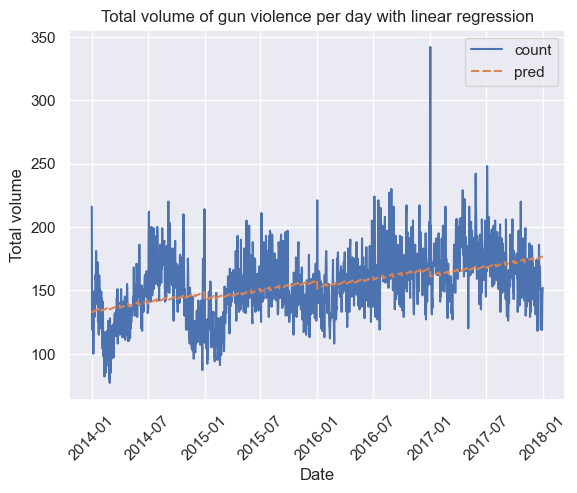

In [37]:
plt.xticks(rotation=45)
sns.lineplot(data=train_df)
plt.xlabel("Date")
plt.ylabel("Total volume")
plt.title("Total volume of gun violence per day with linear regression")
plt.show()

The first thing is while the line seems to capture the general trend, we would need a more complex line to accurately predict this line.  
Any way lets see how it generalizes to 2018. So we do the same thing but with the test data (aka data from 2018). Then output the score.

In [38]:
# Run predictions on 2018 data
test_df = cpd.query("year == 2018").copy()
X_test = test_df.iloc[:, 1:4].values
y_test = test_df.iloc[:, 0].values.reshape(-1, 1)
test_df["pred"] = test_df.apply(
    lambda row: float(reg.predict([[row["year"], row["month"], row["day"]]])), axis=1
)
test_df = test_df.drop(columns=["year", "day", "month"])
reg.score(X_test, y_test)

-0.8194541412845129

The test scores even worse. This was predictable as it is unseen data.
Visualizing this with seaborn shows us:

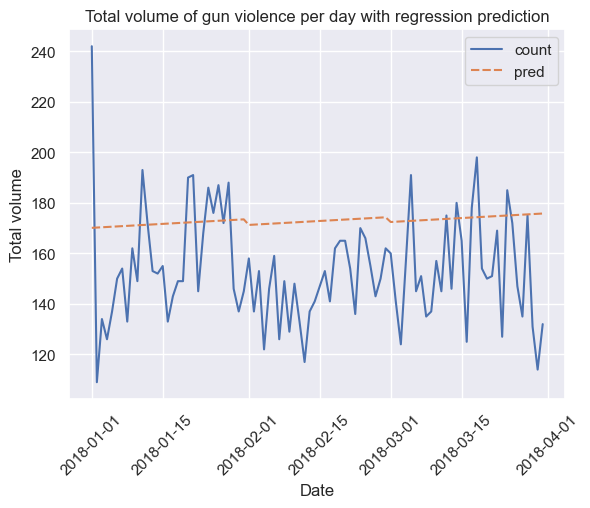

In [39]:
plt.xticks(rotation=45)
sns.lineplot(data=test_df)
plt.xlabel("Date")
plt.ylabel("Total volume")
plt.title("Total volume of gun violence per day with regression prediction")
plt.show()

It seems gun violence actually dropped off, while the the model predicted it would continue to slowly increase.  
Maybe trying a more complicated line will yield better results, so polynomial regression is next. We do the same filter on the years and format it. Then we fit our model and put its predictions back into the dataframe for graphing. Then we drop unneeded columns.

In [40]:
# Polynomial regression training
from sklearn.preprocessing import PolynomialFeatures

train_df = cpd.query("year < 2018").copy()

X_train = train_df.iloc[:, 1:4].values
y_train = train_df.iloc[:, 0].values.reshape(-1, 1)
poly = PolynomialFeatures(5)
poly_X_train = poly.fit_transform(X_train)

clf = LinearRegression()
clf.fit(poly_X_train, y_train)

train_df["pred"] = train_df.apply(
    lambda row: float(
        clf.predict(poly.fit_transform([[row["year"], row["month"], row["day"]]]))
    ),
    axis=1,
)
train_df = train_df.drop(columns=["year", "day", "month"])
clf.score(poly_X_train, y_train)

0.11193099911558801

This score is similarly bad. Its likely the line is simply to complicated to be fit with any function like this. Visualizing the datafram with seaborn shows us:

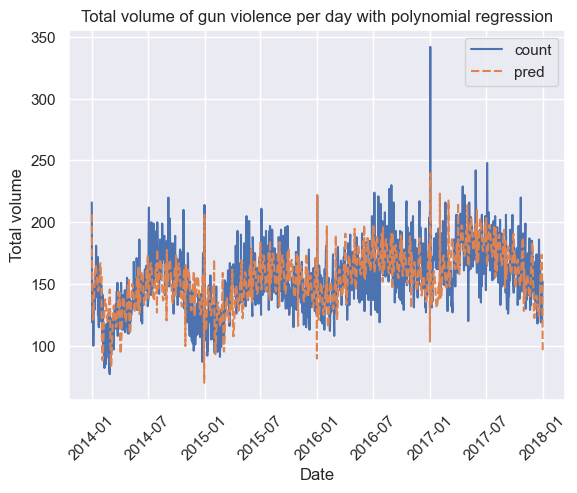

In [41]:
plt.xticks(rotation=45)
sns.lineplot(data=train_df)
plt.xlabel("Date")
plt.ylabel("Total volume")
plt.title("Total volume of gun violence per day with polynomial regression")
plt.show()

It does seem to be following the curve better, it just seems the noise is too much for it.  
Lets try to predict 2018. So we get the 2018 data and use the model to predict the out come, then record the results.

In [42]:
# Polynomial regression on 2018 data
test_df = cpd.query("year == 2018").copy()
X_test = test_df.iloc[:, 1:4].values
y_test = test_df.iloc[:, 0].values.reshape(-1, 1)

poly_X_test = poly.fit_transform(X_test)

test_df["pred"] = test_df.apply(
    lambda row: float(
        clf.predict(
            poly.fit_transform(
                [
                    [
                        row["year"],
                        row["month"],
                        row["day"],
                    ]
                ]
            )
        )
    ),
    axis=1,
)
test_df = test_df.drop(columns=["year", "day", "month"])
clf.score(poly_X_test, y_test)

-1.4608151418296078

Our worst score yet. This is sort of surprising as it seemed to fit better. However polynomial regression is known to not generalize well to unseen data. Visualizing the dataframe with seaborn shows:

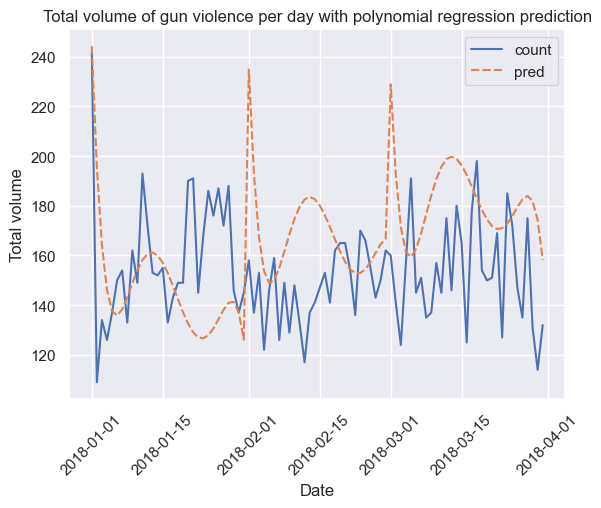

In [43]:
plt.xticks(rotation=45)
sns.lineplot(data=test_df)
plt.xlabel("Date")
plt.ylabel("Total volume")
plt.title("Total volume of gun violence per day with polynomial regression prediction")
plt.show()

We can see this does resemble the curve closer, but seems to have random spikes and overall isn't a great fit. Maybe we can try to do linear regression by year since increase seemed consistant. So we will get the count from earlier since it is already filtered and convert it to a dataframe.

In [44]:
yc = yc.to_frame().reset_index()
yc

year  count
0  2014  51854
1  2015  53579
2  2016  58763
3  2017  61401

Now we must fit the data into out regression model. So we format the columns and call fit.

In [45]:
# Fit year count with linear regression
reg = LinearRegression()
X = yc["year"].values.reshape(-1, 1)
y = yc["count"].values.reshape(-1, 1)
reg.fit(X, y)

LinearRegression()

Now to check the score:

In [46]:
reg.score(X, y)

0.966034042758312

That is much better, it seems to have fit well. To visualize we can add the predictions to the dataframe.

In [47]:
# Add predictions to dataframe
yc["pred"] = yc.apply(
    lambda row: float(reg.predict(row["year"].reshape(-1, 1))), axis=1
)
yc = yc.set_index("year")

Now we can graph it to get the following.

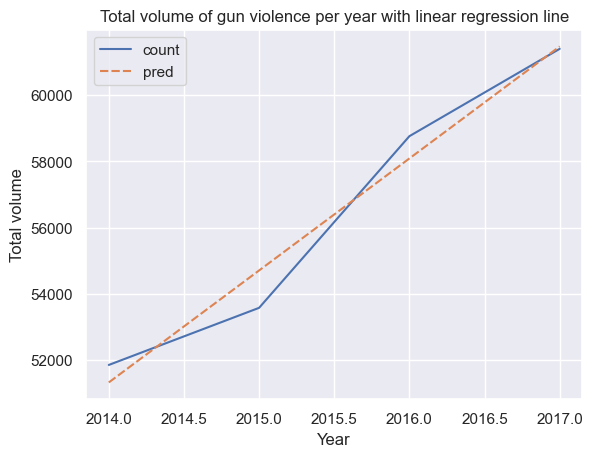

In [48]:
sns.lineplot(data=yc)
plt.xlabel("Year")
plt.ylabel("Total volume")
plt.title("Total volume of gun violence per year with linear regression line")
plt.show()

So it is pretty clear there is a strong positive linear correlation between the increase of gun violence from 2014-2017 and our fit line. This is unlikely to predict future data points as there is no guarantee gun violence will continue increasing, especially not at the same rate.